In [1]:
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import MultiPoint
import pandas as pd
import numpy as np
import json
import pprint
from matplotlib import path

In [51]:
# load GeoJSON file containing boros
with open('selfmap.geojson') as f: #full city is NYC-neighborhoods.geojson
    borosj = json.load(f)
f.close()

# load GeoJSON file containing stations
with open('station_status.json') as f:
    stationsj = json.load(f)
f.close()

In [52]:
stationsj

{'data': {'stations': [{'eightd_active_station_services': [{'id': '6628a325-b5ea-45be-86d0-adfb59293176'}],
    'eightd_has_available_keys': False,
    'is_installed': 1,
    'is_renting': 1,
    'is_returning': 1,
    'last_reported': 1533655260,
    'num_bikes_available': 21,
    'num_bikes_disabled': 3,
    'num_docks_available': 21,
    'num_docks_disabled': 0,
    'num_ebikes_available': 0,
    'station_id': '377'},
   {'eightd_active_station_services': [{'id': '68741c65-d507-4ff5-b47e-3bd0bb8813f7'}],
    'eightd_has_available_keys': False,
    'is_installed': 1,
    'is_renting': 1,
    'is_returning': 0,
    'last_reported': 1533655480,
    'num_bikes_available': 0,
    'num_bikes_disabled': 0,
    'num_docks_available': 33,
    'num_docks_disabled': 0,
    'num_ebikes_available': 0,
    'station_id': '3236'},
   {'eightd_has_available_keys': False,
    'is_installed': 1,
    'is_renting': 1,
    'is_returning': 1,
    'last_reported': 1533656394,
    'num_bikes_available': 3,


In [29]:
myindex=[]
for station in stationsj['data']['stations']:
    myindex.append(station['station_id'])

In [42]:
### JUST GET IDS and NAMES

In [30]:
df=pd.DataFrame(myindex)

In [15]:
df.to_csv("stationids.csv")

In [34]:
df=df.set_index(df[0])
df=df.drop(columns=[0])
df.head()

""
0
377
3236
72
79
82


In [35]:
with open('stations2.json') as f:
    stationsj = json.load(f)
f.close()

In [39]:
#df['names']=" "
for station in stationsj['data']['stations']:
    try:
        df.loc[station['station_id'],'names'] = station['name']
    except:
        df.loc[station['station_id'],'names'] = ""
    #myindex.append(station['station_id'])

In [55]:
df.set_index(df[0]).rename({0:'id','names':'names'})

,0,names
0,,
377,377,6 Ave & Canal St
3236,3236,W 42 St & Dyer Ave
72,72,W 52 St & 11 Ave
79,79,Franklin St & W Broadway
82,82,St James Pl & Pearl St
83,83,Atlantic Ave & Fort Greene Pl
119,119,Park Ave & St Edwards St
120,120,Lexington Ave & Classon Ave
127,127,Barrow St & Hudson St


In [59]:
df=df.set_index(df[0])

In [60]:
df.to_csv("stationids.csv")

In [5]:
latitude=[]
longitude=[]
name=[]
for station in stationsj['data']['stations']:
    latitude.append(station['lat'])
    longitude.append(station['lon'])
    name.append(station['name'])

In [7]:
listolists={'id':myindex,'latitude':latitude,'longitude':longitude,"name":name}

In [8]:
df=pd.DataFrame(listolists)
df.head()

,id,latitude,longitude,name
0,281,40.764397,-73.973715,Grand Army Plaza & Central Park S
1,72,40.767272,-73.993929,W 52 St & 11 Ave
2,79,40.719116,-74.006667,Franklin St & W Broadway
3,82,40.711174,-74.000165,St James Pl & Pearl St
4,83,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl


In [9]:
df.to_csv("allstations.csv")

In [7]:
df.set_index(df.id, inplace=True)

In [8]:
df.drop(columns=['id'], inplace=True)

In [9]:
df.head()

,latitude,longitude
id,,
281,40.764397,-73.973715
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323


In [20]:
points=[]
for station in df.index:
    p=Point(df.loc[station,'longitude'], df.loc[station, 'latitude'])
    points.append(p)
df['location']=points

In [12]:
borosdict={}
for v in borosj['features']:
    poly=v['geometry']['coordinates'][0]
    ntacode=v['properties']['ntacode']
    hood=v['properties']['ntaname']
    boro=v['properties']['boro_name']
    tmpdct={'boro':boro,'hood':hood,'polycoords':poly}
    
    borosdict[ntacode]=tmpdct
    #print(ntacode)
    #pprint.pprint(tmpdct)

KeyError: 'ntacode'

In [14]:
borosdf=pd.DataFrame.from_dict(borosdict,orient='index')

In [15]:
borosdf.head()

,boro,hood,polycoords
BK1,brooklyn,greenpoint williamsburg,"[[-73.96184921264648, 40.73503113801819], [-73..."
BK2,brooklyn,bedstuy,"[[-73.96081924438477, 40.69443569856639], [-73..."
BK3,brooklyn,downtown,"[[-73.97008895874023, 40.70601833122571], [-73..."
BK4,brooklyn,parkslope,"[[-73.98691177368163, 40.68584503000695], [-74..."
BK5,brooklyn,prospect heights,"[[-73.96648406982422, 40.6823303463911], [-73...."


In [16]:
#turn all coordinate pairs into tuples
for hood in borosdf.index:
    poly=borosdf.loc[hood,'polycoords'][0]
    for i in range(0, len(poly)):
        poly[i]=(poly[i][0], poly[i][1])

TypeError: 'float' object is not subscriptable

In [171]:
## create polygons for each neighborhood & store in dataframe
borosdf['shapes']=np.zeros(len(borosdf))
for hood in borosdf.index:
    borosdf.loc[hood,'shapes']=Polygon(borosdf.loc[hood,'polycoords'][0])

In [172]:
df['boro']=np.zeros(len(df))
df['hood']=np.zeros(len(df))
for station in df.index:
    for hood in borosdf.index:
        if df.loc[station,'location'].within(borosdf.loc[hood,'shapes']):
            df.loc[station,'boro']=borosdf.loc[hood,'boro']
            df.loc[station,'hood']=borosdf.loc[hood,'hood']

In [174]:
borosdf[borosdf['boro']==0]

,boro,hood,polycoords,shapes


In [136]:
df[df['boro']==0].to_csv("nycgeo-missing.csv")

In [175]:
#cast index as ints
df.reset_index(inplace=True)
df['id']=df['id'].astype(int)
df.set_index(df.id, inplace=True)
df.drop(columns=['id'], inplace=True)

# replace unfound boros/hoods with strings rather than ints
df.replace(to_replace=[0], value=['0'], inplace=True)

In [25]:
df.head(30)

,latitude,longitude,boro,hood,location
id,,,,,
281,40.764397,-73.973715,manhattan,midtown,POINT (-73.97371465000001 40.7643971)
72,40.767272,-73.993929,manhattan,midtown,POINT (-73.99392888 40.76727216)
79,40.719116,-74.006667,manhattan,village,POINT (-74.00666661 40.71911552)
82,40.711174,-74.000165,manhattan,fidi,POINT (-74.00016545 40.71117416)
83,40.683826,-73.976323,brooklyn,parkslope,POINT (-73.97632328 40.68382604)
119,40.696089,-73.978034,brooklyn,downtown,POINT (-73.97803415 40.69608941)
120,40.686768,-73.959282,brooklyn,bedstuy,POINT (-73.95928168 40.68676793)
127,40.731724,-74.006744,manhattan,village,POINT (-74.00674436 40.73172428)
128,40.727103,-74.002971,manhattan,village,POINT (-74.00297088000001 40.72710258)


In [181]:
borosdf.loc['MN14']

boro                                                  Manhattan
hood                                             Lincoln Square
polycoords    [[(-73.97500111964057, 40.777527779916696), (-...
shapes        POLYGON ((-73.97500111964057 40.7775277799167,...
Name: MN14, dtype: object

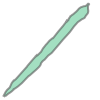

In [231]:
borosdf.loc['MN31','shapes']

In [101]:
import pickle

with open('stationsgeodf.pkl', 'wb') as picklefile:
    pickle.dump(df, picklefile)

In [ ]:
with open('neighborhoodshapesdf.pkl', 'wb') as picklefile:
    pickle.dump(borosdf, picklefile)

### Using self drawn geojson

In [10]:
# load GeoJSON file containing boros
with open('selfmap.geojson') as f:
    borosj = json.load(f)
f.close()

In [11]:
borosdict={}
for v in borosj['features']:
    poly=v['geometry']['coordinates'][0]
    ntacode=v['properties']['code']
    hood=v['properties']['hood']
    boro=v['properties']['boro']
    tmpdct={'boro':boro,'hood':hood,'polycoords':poly}
    
    borosdict[ntacode]=tmpdct

In [12]:
borosdf=pd.DataFrame.from_dict(borosdict,orient='index')

In [13]:
borosdf.head()

,boro,hood,polycoords
BK1,brooklyn,greenpoint williamsburg,"[[-73.96184921264648, 40.73503113801819], [-73..."
BK2,brooklyn,bedstuy,"[[-73.96081924438477, 40.69443569856639], [-73..."
BK3,brooklyn,downtown,"[[-73.97008895874023, 40.70601833122571], [-73..."
BK4,brooklyn,parkslope,"[[-73.98691177368163, 40.68584503000695], [-74..."
BK5,brooklyn,prospect heights,"[[-73.96648406982422, 40.6823303463911], [-73...."


In [14]:
#turn all coordinate pairs into tuples
for hood in borosdf.index:
    poly=borosdf.loc[hood,'polycoords']
    for i in range(0, len(poly)):
        poly[i]=(poly[i][0], poly[i][1])

In [24]:
borosdf.head()

,boro,hood,polycoords,shapes
BK1,brooklyn,greenpoint williamsburg,"[(-73.96184921264648, 40.73503113801819), (-73...",POLYGON ((-73.96184921264648 40.73503113801819...
BK2,brooklyn,bedstuy,"[(-73.96081924438477, 40.69443569856639), (-73...",POLYGON ((-73.96081924438477 40.69443569856639...
BK3,brooklyn,downtown,"[(-73.97008895874023, 40.70601833122571), (-73...",POLYGON ((-73.97008895874023 40.70601833122571...
BK4,brooklyn,parkslope,"[(-73.98691177368163, 40.68584503000695), (-74...",POLYGON ((-73.98691177368163 40.68584503000695...
BK5,brooklyn,prospect heights,"[(-73.96648406982422, 40.6823303463911), (-73....","POLYGON ((-73.96648406982422 40.6823303463911,..."


In [16]:
## create polygons for each neighborhood & store in dataframe
borosdf['shapes']=np.zeros(len(borosdf))
for hood in borosdf.index:
    borosdf.loc[hood,'shapes']=Polygon(borosdf.loc[hood,'polycoords'])

In [22]:
df['boro']=np.zeros(len(df))
df['hood']=np.zeros(len(df))
for station in df.index:
    for hood in borosdf.index:
        if df.loc[station,'location'].within(borosdf.loc[hood,'shapes']):
            df.loc[station,'boro']=borosdf.loc[hood,'boro']
            df.loc[station,'hood']=borosdf.loc[hood,'hood']

In [203]:
# #cast index as ints
# df.reset_index(inplace=True)
# df['id']=df['id'].astype(int)
# df.set_index(df.id, inplace=True)
# df.drop(columns=['id'], inplace=True)

#replace unfound boros/hoods with nan
df.replace(to_replace=[0], value=[np.nan], inplace=True)

In [145]:
df[df['boro']==0].to_csv("selfgeomissing.csv")

In [19]:
exportstations=df.drop(columns=['la'])
df.to_csv("bikestations.csv")

In [26]:
df.head()

,latitude,longitude,boro,hood,location
id,,,,,
281,40.764397,-73.973715,manhattan,midtown,POINT (-73.97371465000001 40.7643971)
72,40.767272,-73.993929,manhattan,midtown,POINT (-73.99392888 40.76727216)
79,40.719116,-74.006667,manhattan,village,POINT (-74.00666661 40.71911552)
82,40.711174,-74.000165,manhattan,fidi,POINT (-74.00016545 40.71117416)
83,40.683826,-73.976323,brooklyn,parkslope,POINT (-73.97632328 40.68382604)
